<a href="https://colab.research.google.com/github/unpackAI/DL101/blob/main/01_CV_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Week 1 Workbook of unpackAI "DL101 Bootcamp"


## 📕 Learning Objectives of the Week

* Understand the fundamental process of building your own image classification project.

## 🔗 Install & Import Required Code Packages 

In [ ]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 30.2 MB/s 
     |████████████████████████████████| 189 kB 20.6 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 323 kB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 89 kB 4.9 MB/s 


In [ ]:
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *

## unpackAI Assignment Section

 
*   **Assignment 1**: Go through the multiple choice questions below and choose the correct answer. Discuss during the presentation session.
*   **Assignment 2**: Build an entire single label classification model starting from defining your objective, gathering data to training your model and interpreting the results.

## Assigment 1: Go through the multiple choice questions below and choose the correct answer. Discuss during the presentation session.

1. What is overfitting?

> A: Overfitting is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high loss on both the training set and unseen data.

> B: Overfitting happens when a model learns and memorizes the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This results in a further decreasing loss on the training set but an increasing loss on the validation set.

> C: Overfitting is when the model is performing very well on the training, validation and test set and achieves a very low loss in all 3 data sets. This means that your model is ready to be used in practice.


2. What is a training, validation and test set?

> A: The *training set* is the sample of data used to start fitting and training the model. The *test set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters. The *validation set* is the sample of data used to evaluate the final model without continuing to tune its parameters.

> B: The *test set* is the sample of data used to start fitting and training the model. The *training set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters. The *validation set* is the sample of data used to evaluate the final model without continuing to tune its parameters.

> C: The *training set* is the sample of data used to start fitting and training the model. The *validation set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters. The *test set* is the sample of data used to evaluate the final model without continuing to tune its parameters.

3. Observe the `Learner` that you have encountered in the Coursebook. What are the key **metrics** to represent the model's performance? Name and explain them.

> A: The key metrics are *epochs* and *time*. Both give us key insights how much memory the model requires and its performance.

> B: The key metrics are *train_loss*, *valid_loss* and *error rate / accuray*. Each metric provides insights on the model's performance on the training set, validation set and test set.

> C: The single most important metric is the *loss*. The loss is what tells the machine and human how the model performs.

4. What is the difference between Classification and Regression in Machine Learning?

> A: A *classification model* is one that attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat". A *regression model* is one that attempts to predict one or more numeric quantities, such as a temperature or a location.

> B: A *regression model* is one that attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat". A *classification model* is one that attempts to predict one or more numeric quantities, such as a temperature or a location.

> C: A *classification model* is one that attempts to utilize sorting algorithms that can allow it to learn time-dependent patterns across multiples models different from images and speech. A *regression model* is one that attempts to to predict the "rating" or "preference" a user would give to an item.

5. What is transfer learning in Machine Learning?

> A: Transfer learning is a machine learning technique where the parameters of a model are not updated through model training but simply replaced by the parameters of another pre-trained model.

> B: Transfer learning is a technique where a machine learning engineer uses his expertise and techniques in another industry to a problem in an industry he does not have much experience in.

> C: A: Transfer learning is a machine learning technique where a pre-trained model is re-purposed on a second related task. In practice this means that, we use an existing already-trained model and its trained "intelligence" to utilize it for our own use case.

## Assignment 2: Build an entire single label classification model starting from defining your objective, gathering data to training your model and interpreting the results.

### Step One - Define a ML problem and propose a solution.

#### 1. Define the objective (what goal, metrics to measure success)
**Your objective:**

*Example objective: The goal is to build a model that is able to differentiate between grizzly bears, black bears and teddy bears with a minimum accuracy of 90%.*
#### 2. Describe your dataset (what data, how many classes etc.)
**Your dataset:**

*Example dataset: The dataset consists of a total of 450 images seperated in 3 different classes that each have a set of 150 images. The three classes are: "black", "grizzly" and "teddy".*
#### 3. Describe your model (what is the model supposed to do)
**Your model:**

*Example model: A 3-class, single-label classification model, which correctly classifies an image that it has never seen before in one of three classes named above.*

### Step Two - Collect and construct your dataset

In order to collect and design your own dataset we provide you with the scraping tool below.

**DuckDuckGo Image Scraper** - Scrape and Collect images via a search engine from the web.

In order to collect your images we will be utilizing **DuckDuckGo**. DuckDuckGo is an internet search engine that emphasizes protecting searchers' privacy and avoiding the filter bubble of personalized search results.

The below is a slightly modified version of the notebook by [Jew Dockrill](https://joedockrill.github.io/jmd_imagescraper/). Many thanks to him for the notebook and the package he wrote.

> Note: When using a Web Search Engine to download your pictures, there's no way to be sure exactly what images a search like this will find. The results can change over time. We've heard of at least one case of a community member who found some unpleasant pictures in their search results. You'll receive whatever images are found by the web search engine. If you're running this at work, or with kids, etc, then be cautious before you display the downloaded images.

##### Install & import `DuckDuckGoImageScraper` specific packages

In [ ]:
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
from pathlib import Path
from jmd_imagescraper.core import *

##### Download images

Below you can see an example, of what changes would be required to work with a teddy, grizzly and black bear dataset.

```
IMAGE_DIR = Path("/content/gdrive/MyDrive/images")  # Comment: You can store in a different Google Drive Folder
number_images_to_download = 50         

duckduckgo_search(IMAGE_DIR, "teddy", "teddy bear", max_results=number_images_to_download)
duckduckgo_search(IMAGE_DIR, "grizzly", "grizzly bear", max_results=number_images_to_download)
duckduckgo_search(IMAGE_DIR, "black", "black bear", max_results=number_images_to_download)
```



Now modify the code below for your own use case. You will have to:

1. `path`: Define the `path` which will be the folder in which you will temporarily save the images. Once you disconnect, the images will be deleted.
1. `number_images_to_download`: The number of images you download per defined class. This can go up to 477 at the time of writing.
1. `duckduckgo_search`: You will have to define your **classes** (for example: teddy, grizzly, black) and your **search term** (for example: teddy bear, grizzly bear, black bear).

> Note: When downloading the images please make sure to check your search terms ahead of running the script below. Go and search for yourself to define the best search terms.


In [ ]:
path = Path().cwd()/"images"
number_images_to_download = 50

duckduckgo_search(path, "apple", "apple in the basket", max_results=number_images_to_download)
duckduckgo_search(path, "orange", "orange", max_results=number_images_to_download)
duckduckgo_search(path, "pineapple", "pineapple", max_results=number_images_to_download)

Duckduckgo search: apple


Duckduckgo search: orange


Duckduckgo search: pineapple


[Path('/content/images/pineapple/001_df0601bc.jpg'),
 Path('/content/images/pineapple/002_64a9b21b.jpg'),
 Path('/content/images/pineapple/003_551463bd.jpg'),
 Path('/content/images/pineapple/004_c7d7e0d8.jpg'),
 Path('/content/images/pineapple/005_08d61fd5.jpg'),
 Path('/content/images/pineapple/006_94d1d7b0.jpg'),
 Path('/content/images/pineapple/007_aa346979.jpg'),
 Path('/content/images/pineapple/008_beb962c3.jpg'),
 Path('/content/images/pineapple/009_4f4d93fa.jpg'),
 Path('/content/images/pineapple/010_419d883e.jpg'),
 Path('/content/images/pineapple/011_ed2a5fc1.jpg'),
 Path('/content/images/pineapple/012_fafdde66.jpg'),
 Path('/content/images/pineapple/013_55d2d49c.jpg'),
 Path('/content/images/pineapple/014_a58b7f94.jpg'),
 Path('/content/images/pineapple/015_8988e396.jpg'),
 Path('/content/images/pineapple/016_4a3523be.jpg'),
 Path('/content/images/pineapple/017_cf05456f.jpg'),
 Path('/content/images/pineapple/018_47dd0b0f.jpg'),
 Path('/content/images/pineapple/019_8750f291.

##### Displaying the image cleaner

Use this to get rid of unsuitable images without leaving your notebook.

In [ ]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

Some time especially in real life projects, erronous image is a frequently occuring thing, you can fix the problem by deleting all of our faulty images. 

**We leave it up to you to finish your own model using your own dataset!**

In [ ]:
clean_error_img(path)

#### Your own data

If you want to use your own personal data, you can upload your images using the file system on the right (see the image below).

> Hint: Make sure to define your path so that it points to your main folder that contains your labeled folders with the images. A great way to do that is to use the *folder* icon on the left, to find the right folder, right click and *copy path*.


```
path = Path("insert path here")
```

**However, considering your own time, we recommend you to use the DuckDuckGo Image Scraper above.**

### Step Three - Data Transformation: Create your **DataLoaders** and utilize **Data Augmentation Methods** to improve your dataset.



### Step Three - Train your model.

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,2.333305,4.931971,0.366667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,2.240285,3.117348,0.366667,00:01
1,2.026896,1.355941,0.566667,00:01
2,1.797445,0.704611,0.733333,00:01
3,1.570806,0.591338,0.733333,00:01
4,1.335899,0.557986,0.733333,00:01
5,1.169187,0.542616,0.733333,00:01


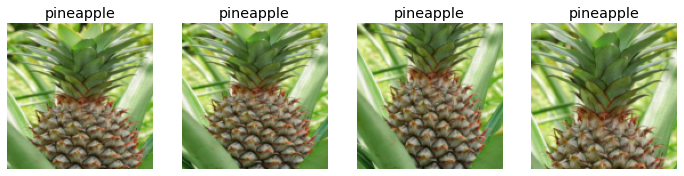

### Step Four - Interpret the model and make predictions: Create a notebook app to upload and classify external images.

> Hint: Utilize the *top losses* and *classification marix* methods seen in the coursebook to interpret your model.
